# Notes on Chapter 4 of *Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow* by Aurélien Géron

Basic SVC example with Iris dataset

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # petal length and width
y = (iris['target'] == 2).astype(np.float64) # Iris virginica

In [3]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

Let's make a simple plotting function to see the decision boundary (similar to the plots the author shows)

In [4]:
def plot_2D_classifier(m, X, y):
    axis_mins = np.min(X, axis=0)
    axis_maxs = np.max(X, axis=0)
    axis_range = axis_maxs - axis_mins
    
    axis_padding = 0.2 * axis_range
    axis_mins = -axis_padding + axis_mins
    axis_maxs = axis_padding + axis_maxs
    axis_range = 2*axis_padding + axis_range
    
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlim(axis_mins[0], axis_maxs[0])
    plt.ylim(axis_mins[1], axis_maxs[1])
    
    uv = np.linspace(axis_mins, axis_maxs, 300)
    grid_u, grid_v = np.meshgrid(uv[:,0], uv[:,1])
    grid_X = np.hstack(
        (grid_u.flatten()[:,np.newaxis],
         grid_v.flatten()[:,np.newaxis]))
    grid_decision = m.decision_function(grid_X).reshape(grid_u.shape)
    grid_predict = m.predict(grid_X).reshape(grid_u.shape)
    plt.contour(grid_u, grid_v, grid_decision, alpha=0.1)
    plt.contour(grid_u, grid_v, grid_predict, 1)

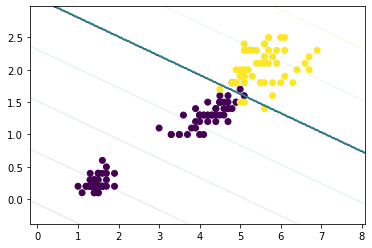

In [5]:
plot_2D_classifier(svm_clf, X, y)

Non-linear example.  We start by loading a synthetic non-linear dataset.

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

This obviously will not work well with a simple linear model:

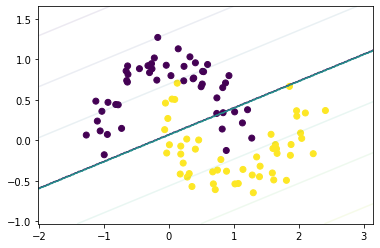

In [7]:
svm_clf.fit(X, y)
plot_2D_classifier(svm_clf, X, y)

Next, we fit by adding polynomial features.

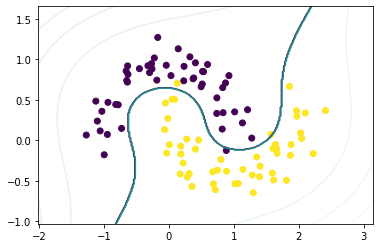

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_svm = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=5000, tol=1e-2))
])

poly_svm.fit(X, y)
plot_2D_classifier(poly_svm, X, y)

We potentially can have better performance with polynomial kernels:

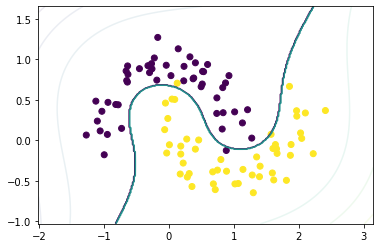

In [9]:
from sklearn.svm import SVC
polyk_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5, max_iter=5000))
])

polyk_svm.fit(X, y)
plot_2D_classifier(polyk_svm, X, y)

We can also try radial basis functions:

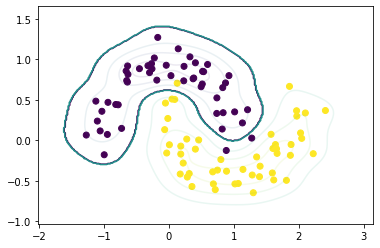

In [10]:
rbf_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001, max_iter=5000))
])

rbf_svm.fit(X, y)
plot_2D_classifier(rbf_svm, X, y)

SVMs also work for regression, of course.

In [11]:
np.random.seed(42)
X = np.random.uniform(0., 2., (100,1))
y = (2*X + 3 + np.random.normal(0., 1., X.shape))[:,0]

def plot_1D_regressor(model, X, y):
    X_hat = np.linspace(np.min(X), np.max(X), 500)[:, np.newaxis]
    y_hat = model.predict(X_hat)
    plt.scatter(X, y)
    plt.plot(X_hat, y_hat)

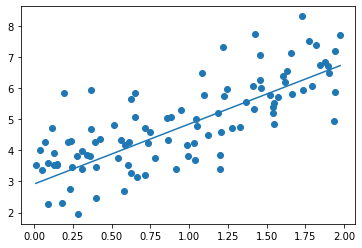

In [12]:
from sklearn.svm import LinearSVR

svr = LinearSVR(epsilon=1.)
svr.fit(X, y)
plot_1D_regressor(svr, X, y)

Polynomial features are also supported.

In [13]:
X = np.random.uniform(-1., 1., (100,1))
y = (0.5*X**2 + 3 + np.random.normal(0., 0.1, X.shape))[:,0]

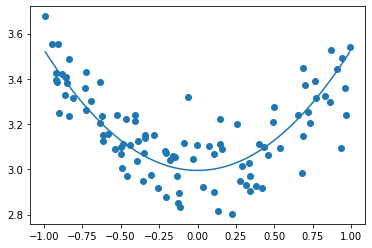

In [14]:
np.random.seed(42)
from sklearn.svm import SVR

svr = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svr.fit(X, y)
plot_1D_regressor(svr, X, y)

## Exercises

### 5.1

Maximizing the width of the decision boundary

### 5.2

The points limiting further expansion of the decision boundary

### 5.3

So that the width in the decision boundary is sensible for each dimension.

### 5.4

Not directly, but the distance from the center of the street and the width of the street can be used to construct a second model for confidence/probability.

### 5.5

Only if you need to use the kernel trick; otherwise it is likely more efficient to use the primal form.

### 5.6

Increase both gamma and/or C.

### 5.7

$$
\begin{align}
H_{i,j} &= \cases{1,&if $i = j$ and $i \ne 0$;\cr0,&otherwise.\cr} \\
f_i &= 0 \\
A_{i,j} &= \cases{1,&when $j = n + 1$ where $n$ is the number of features;\cr X_{i,j},&otherwise.\cr}
\end{align}
$$

### 5.8

First we generate some test data:

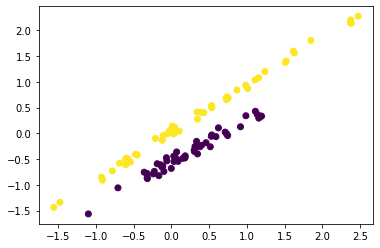

In [15]:
X,y = datasets.make_classification(n_features=2, n_redundant=0, n_repeated=0, class_sep=0.3, random_state=42, n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], c=y)

First the linear SVC:

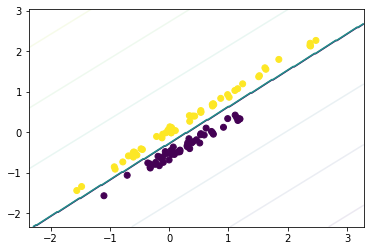

In [16]:
linear_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

linear_svc.fit(X, y)
plot_2D_classifier(linear_svc, X, y)

Next, the standard SVC forced to use the linear model:

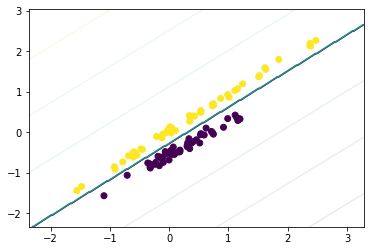

In [20]:
svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel="poly", degree=1))
])

svc.fit(X, y)
plot_2D_classifier(svc, X, y)

Finally the SGDClassifier

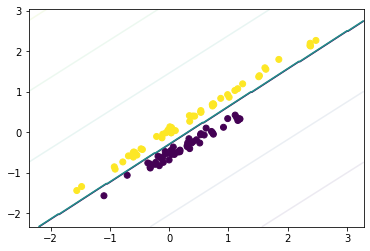

In [23]:
from sklearn.linear_model import SGDClassifier
sgd = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier())
])

sgd.fit(X, y)
plot_2D_classifier(sgd, X, y)